In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [7]:
# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"
time = "2024-03-31_16:37"
time = "2024-03-31_17:12"
time = "2024-04-01_15:42"
time = "2024-04-01_17:06"
time = "2024-04-01_18:11"
time = "2024-04-16_16:47"
time = "2024-04-18_19:23"
time = "2024-04-18_20:30"
time = "2024-04-19_01:29"
time = "2024-04-19_09:39"
time = "2024-05-19_16:34"
time = "2024-05-19_16:58"
time = "2024-05-19_17:38"
time = "2024-05-19_18:55"



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/unsupervised/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
# df = df[df["algorithm"] == "kmeans"]
# df = df[(df["test_negative_sharpe_ratio"] >= 1) | (df["test_sharpe_ratio"] >= 1)]
df = df[(df["test_negative_sharpe_ratio"] >= 0.15) | (df["test_sharpe_ratio"] >= 0.15)]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,max_k_labels,n_clusters,algorithm,train_size,test_size,random_state
1697,0,0.33,33,83,-0.08,-8,8,0.33,33,3.170273,-0.08,-8,-0.321087,0.153760,1,90,gaussian_mixture,4800,960,90
1698,1,0.41,41,79,-0.06,-6,16,0.74,74,3.170273,-0.14,-14,-0.321087,0.153760,1,90,gaussian_mixture,4800,960,90
1699,2,0.38,38,91,0.00,0,8,1.12,112,3.170273,-0.14,-14,-0.321087,0.153760,1,90,gaussian_mixture,4800,960,90
1700,3,0.48,48,130,-0.18,-18,46,1.60,160,3.170273,-0.32,-32,-0.321087,0.153760,1,90,gaussian_mixture,4800,960,90
1701,4,0.39,39,87,-0.06,-6,14,1.99,199,3.170273,-0.38,-38,-0.321087,0.153760,1,90,gaussian_mixture,4800,960,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152892,69,0.64,64,109,0.05,5,5,46.92,4692,4.445526,-1.96,-196,-0.371901,0.187816,2,90,kmeans,4800,960,10
152893,70,0.58,58,121,0.00,0,18,47.50,4750,4.445526,-1.96,-196,-0.371901,0.187816,2,90,kmeans,4800,960,10
152894,71,0.78,78,137,-0.07,-7,17,48.28,4828,4.445526,-2.03,-203,-0.371901,0.187816,2,90,kmeans,4800,960,10
152895,72,0.65,65,136,-0.09,-9,23,48.93,4893,4.445526,-2.12,-212,-0.371901,0.187816,2,90,kmeans,4800,960,10


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


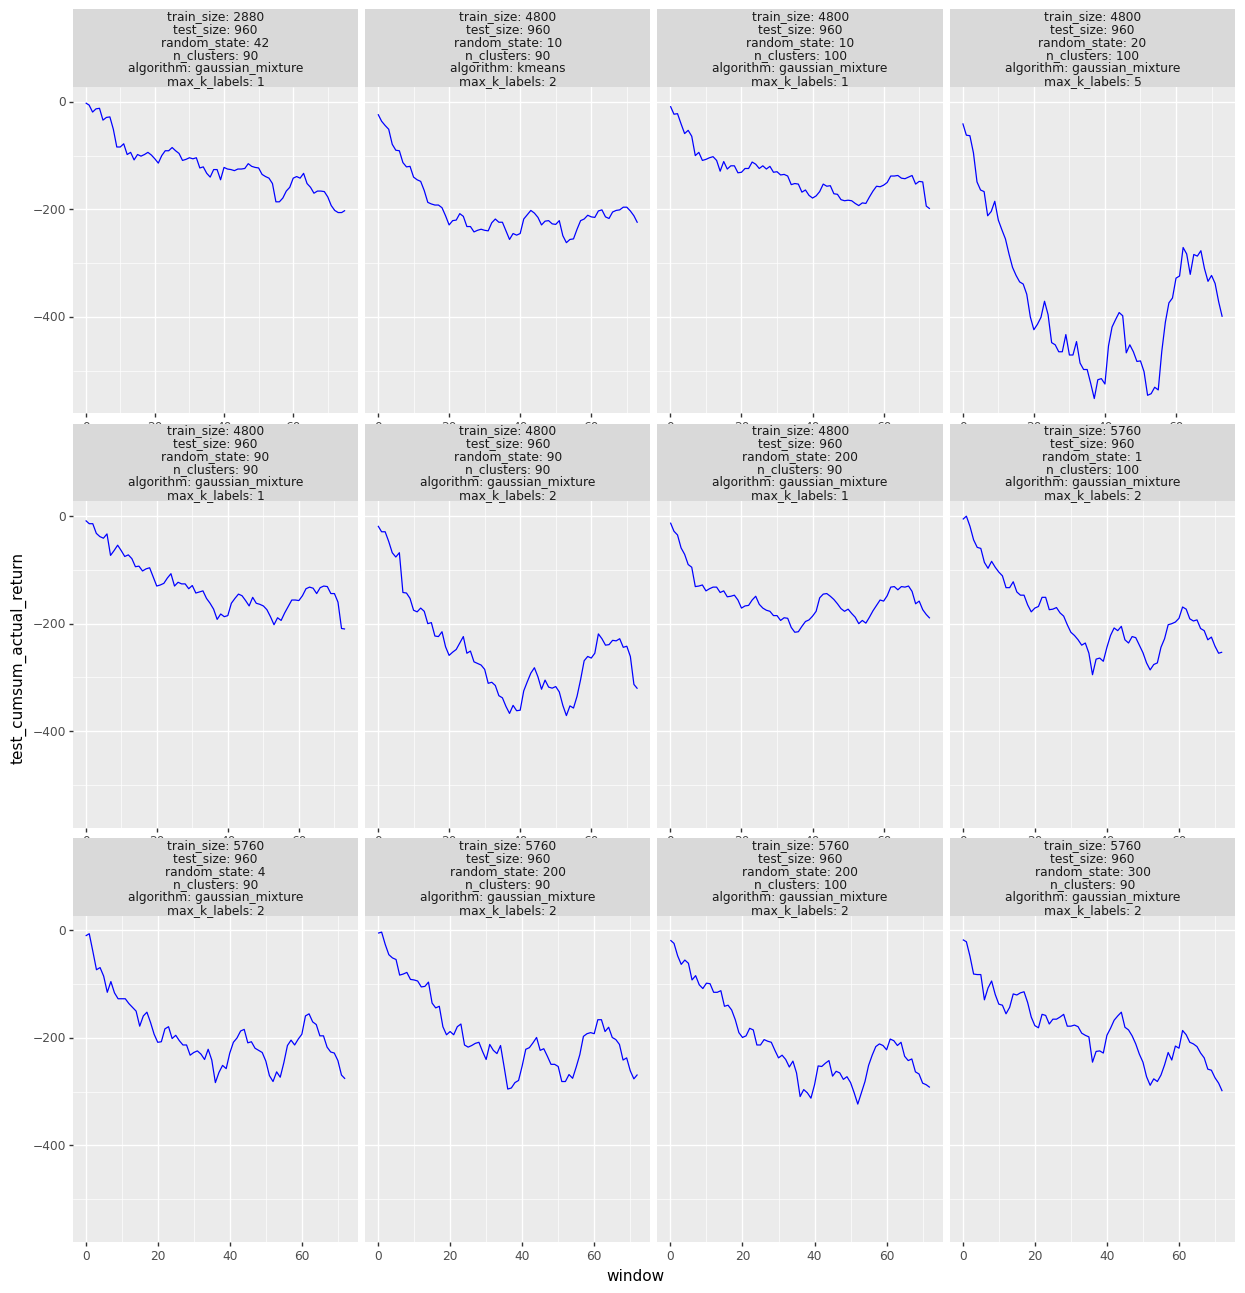

In [8]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
# p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + facet_wrap("~train_size + test_size + random_state + n_clusters + algorithm + max_k_labels", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(15, 15))
# p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)